In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import random as rd

In [15]:
def vitruvium_dice_roller():
    variants = [0, 1, 2]
    probs = [3/6, 2/6, 1/6]
    return np.random.choice(variants, p=probs)

In [16]:
def vitruvium_dice_roller_plus():
    ans = 0
    for _ in range(2):
        variants = [0, 1, 2]
        probs = [3/6, 2/6, 1/6]
        result = np.random.choice(variants, p=probs)
        if result > ans:
            ans = result
    return ans

In [3]:
def probability_vitruvium_dices(max_dice: int, sample_size: int):
    max_success = 2 * max_dice
    results = np.zeros((max_dice, max_success + 1))

    for dice_count in range(1, max_dice + 1):
        success_counts = np.zeros(max_success + 1)
        
        for _ in range(sample_size):
            total_success = sum(vitruvium_dice_roller() for _ in range(dice_count))
            if total_success <= max_success:
                success_counts[total_success] += 1
        probabilities = [round(count / sample_size, 4) for count in success_counts]
        results[dice_count - 1] = probabilities
    
    return results.tolist()

In [4]:
def visualize_probability_table(probabilities: list[list[float]]):
    max_dice = len(probabilities)
    max_success = len(probabilities[0]) - 1
    df = pd.DataFrame(probabilities,
                     index=range(1, max_dice + 1),
                     columns=range(0, max_success + 1))
    plt.figure(figsize=(16, 12))
    color_palette = 'YlGnBu'
    ax = sb.heatmap(df, 
                annot=True, 
                fmt='.2f',
                cmap=color_palette, 
                cbar_kws={'label': 'Вероятность'},
                linewidths=0.5,
                annot_kws={
                    'size': 14,
                    'weight': 'bold'
                })
    plt.title('Дайсы Витрувия', 
              fontsize=18, pad=25, weight='bold')
    plt.xlabel('Количество успехов', fontsize=16, weight='bold')
    plt.ylabel('Количество кубов', fontsize=16, weight='bold')
    ax.tick_params(axis='both', which='major', labelsize=14)
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    cbar.set_label('Вероятность', size=16, weight='bold')
    
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

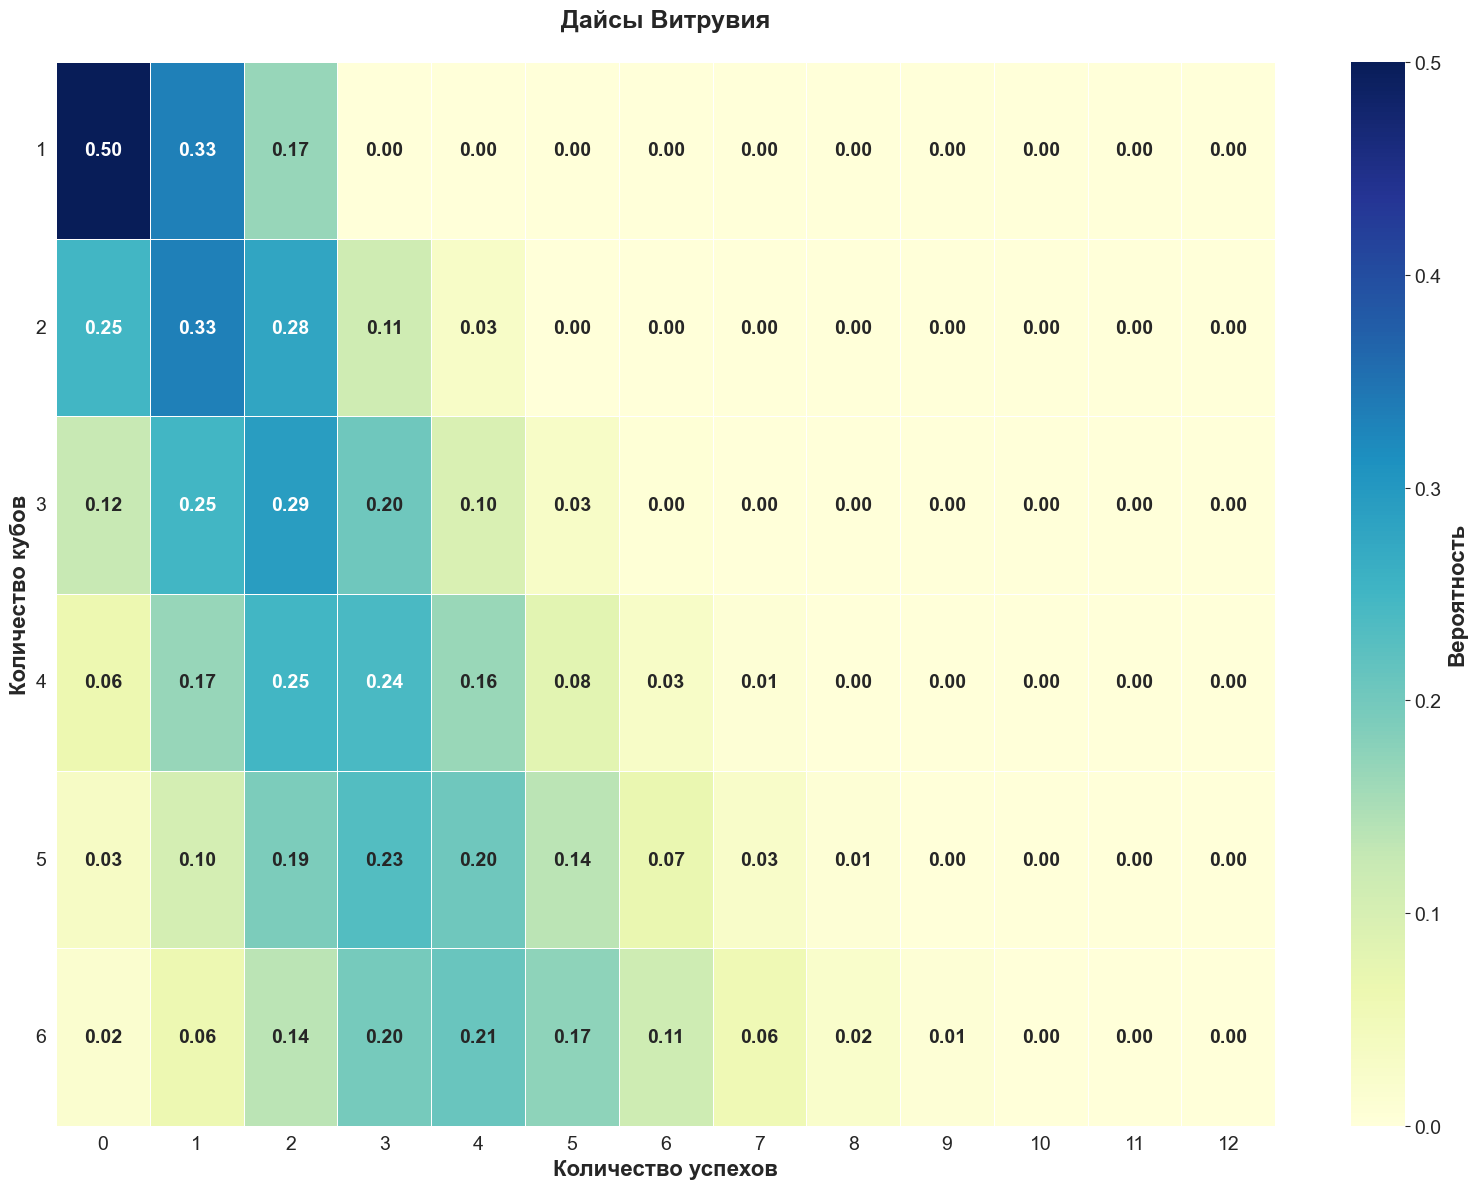

In [33]:
MAX_DICE = 6
SAMPLE_SIZE = 1000000
prob_matrix = probability_vitruvium_dices(MAX_DICE, SAMPLE_SIZE)
visualize_probability_table(prob_matrix)

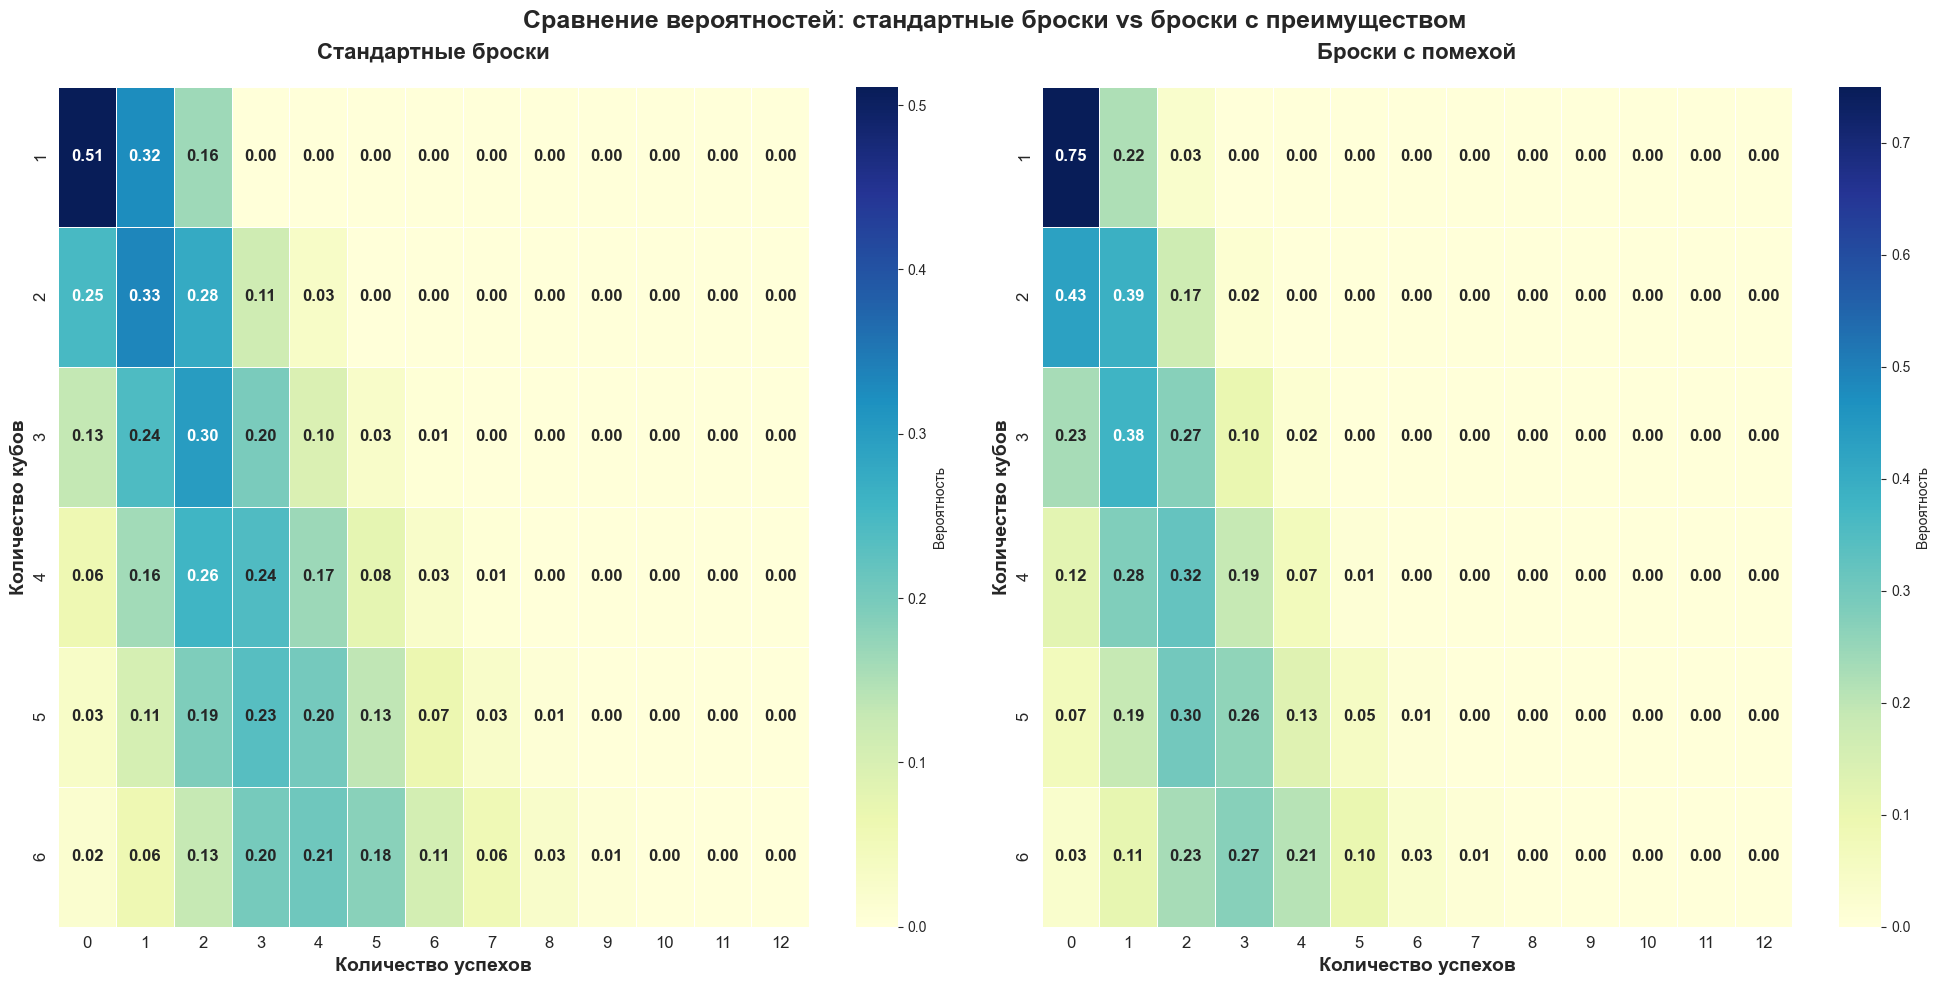

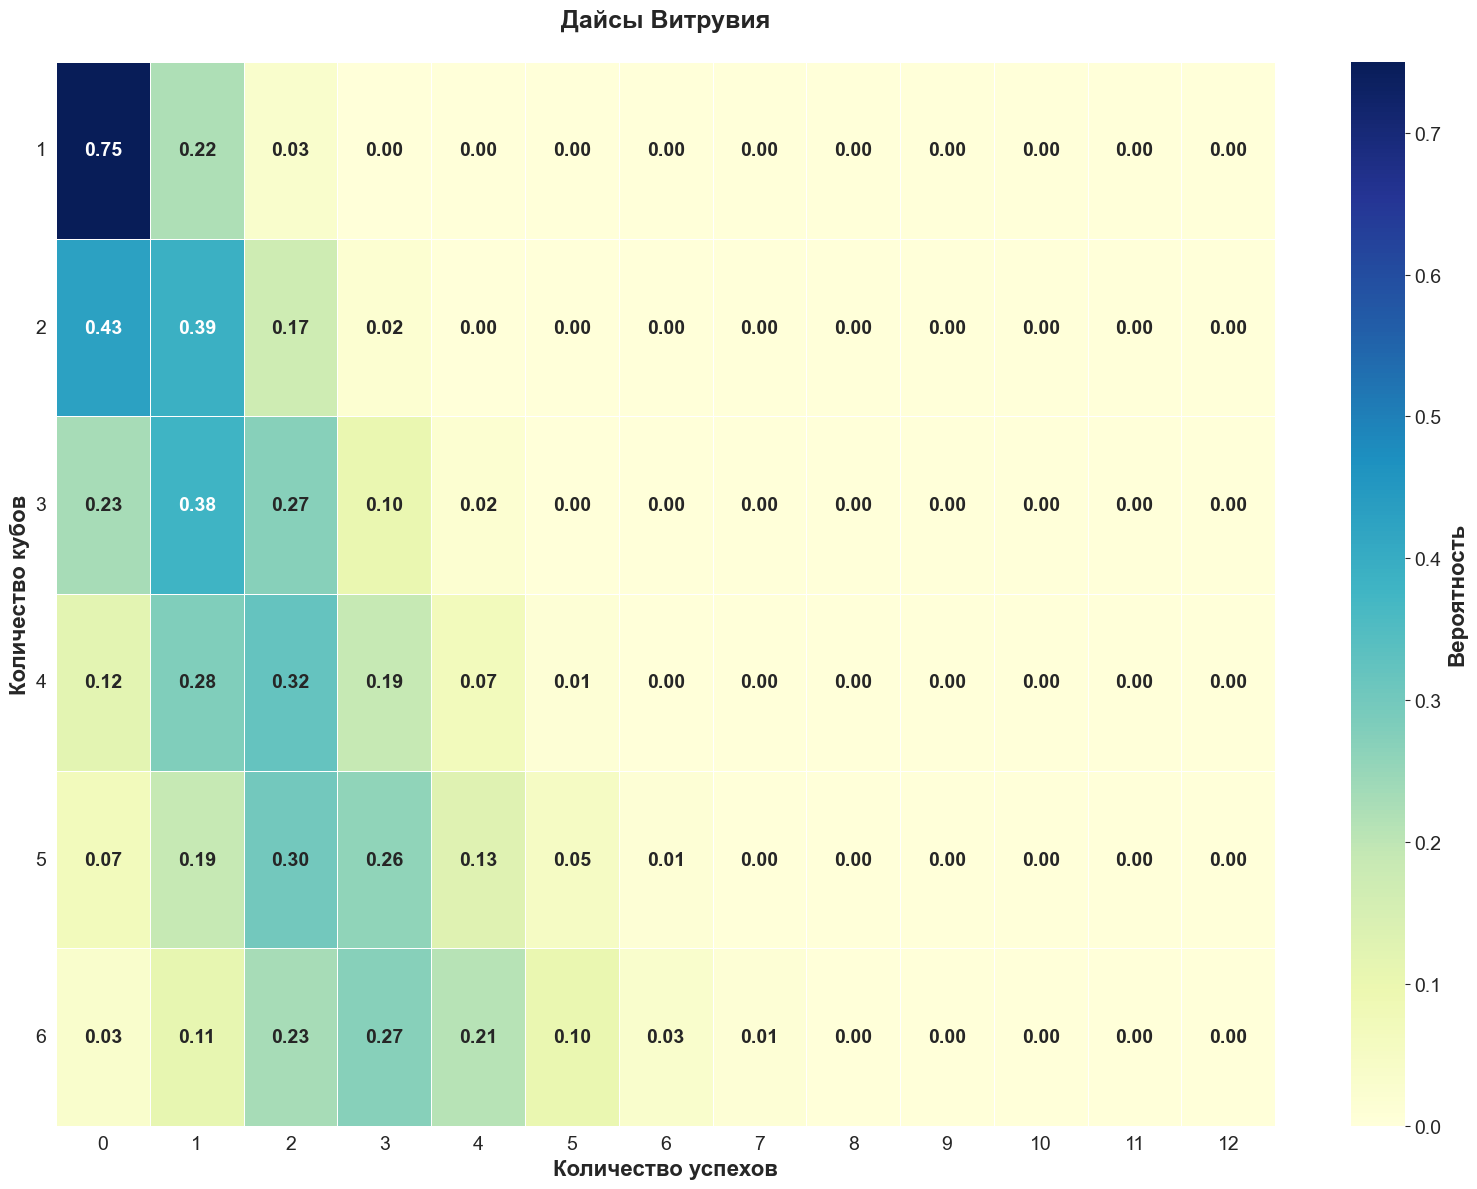

In [10]:
def probability_vitruvium_dices_advantage(max_dice: int, sample_size: int) -> list[list[float]]:
    """
    Функция для расчета вероятностей количества успехов при броске с преимуществом.
    Каждое количество кубов бросается дважды, выбирается лучший результат.
    
    Args:
        max_dice (int): Максимальное количество кубов (от 1 до max_dice)
        sample_size (int): Количество экспериментов для каждого количества кубов
    
    Returns:
        List[List[float]]: Матрица вероятностей успехов с преимуществом
    """
    # Создаем матрицу для хранения результатов
    max_success = 2 * max_dice  # Максимально возможное количество успехов
    results = np.zeros((max_dice, max_success + 1))
    
    # Проводим эксперименты для каждого количества кубов
    for dice_count in range(1, max_dice + 1):
        success_counts = np.zeros(max_success + 1)
        
        for _ in range(sample_size):
            # Бросаем указанное количество кубов дважды
            success_first = sum(vitruvium_dice_roller() for _ in range(dice_count))
            success_second = sum(vitruvium_dice_roller() for _ in range(dice_count))
            
            # Выбираем лучший результат (максимальное количество успехов)
            total_success = min(success_first, success_second)
            
            if total_success <= max_success:
                success_counts[total_success] += 1
        
        # Нормализуем результаты для получения вероятностей и округляем до 2 знаков
        results[dice_count - 1] = np.round(success_counts / sample_size, 2)
    
    return results.tolist()

def visualize_comparison_tables(standard_probs: list[list[float]], advantage_probs: list[list[float]]):
    """
    Функция для визуального сравнения стандартных бросков и бросков с преимуществом.
    
    Args:
        standard_probs (List[List[float]]): Матрица вероятностей для стандартных бросков
        advantage_probs (List[List[float]]): Матрица вероятностей для бросков с преимуществом
    """
    max_dice = len(standard_probs)
    max_success = len(standard_probs[0]) - 1
    
    # Создаем DataFrames для обоих наборов вероятностей
    df_standard = pd.DataFrame(standard_probs,
                              index=range(1, max_dice + 1),
                              columns=range(0, max_success + 1))
    
    df_advantage = pd.DataFrame(advantage_probs,
                               index=range(1, max_dice + 1),
                               columns=range(0, max_success + 1))
    
    # Создаем фигуру с двумя подграфиками
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    
    # Настраиваем общую цветовую палитру
    color_palette = 'YlGnBu'
    
    # Первый график: стандартные броски
    sb.heatmap(df_standard, 
                annot=True, 
                fmt='.2f',
                cmap=color_palette, 
                cbar_kws={'label': 'Вероятность'},
                linewidths=0.5,
                annot_kws={
                    'size': 12,
                    'weight': 'bold'
                },
                ax=ax1)
    
    ax1.set_title('Стандартные броски', fontsize=16, pad=20, weight='bold')
    ax1.set_xlabel('Количество успехов', fontsize=14, weight='bold')
    ax1.set_ylabel('Количество кубов', fontsize=14, weight='bold')
    ax1.tick_params(axis='both', which='major', labelsize=12)
    
    # Второй график: броски с преимуществом
    sb.heatmap(df_advantage, 
                annot=True, 
                fmt='.2f',
                cmap=color_palette, 
                cbar_kws={'label': 'Вероятность'},
                linewidths=0.5,
                annot_kws={
                    'size': 12,
                    'weight': 'bold'
                },
                ax=ax2)
    
    ax2.set_title('Броски с помехой', fontsize=16, pad=20, weight='bold')
    ax2.set_xlabel('Количество успехов', fontsize=14, weight='bold')
    ax2.set_ylabel('Количество кубов', fontsize=14, weight='bold')
    ax2.tick_params(axis='both', which='major', labelsize=12)
    
    # Общий заголовок
    plt.suptitle('Сравнение вероятностей: стандартные броски vs броски с преимуществом', 
                 fontsize=18, weight='bold', y=0.98)
    
    plt.tight_layout()
    plt.show()

# Параметры эксперимента
MAX_DICE = 6
SAMPLE_SIZE = 10000

# Расчет вероятностей для стандартных бросков
prob_matrix_standard = probability_vitruvium_dices(MAX_DICE, SAMPLE_SIZE)

# Расчет вероятностей для бросков с преимуществом
prob_matrix_advantage = probability_vitruvium_dices_advantage(MAX_DICE, SAMPLE_SIZE)

# Визуализация сравнения
visualize_comparison_tables(prob_matrix_standard, prob_matrix_advantage)

# Также можно визуализировать отдельно броски с преимуществом
visualize_probability_table(prob_matrix_advantage)

In [25]:
def probability_comparison(num_1: int, num_2: int, samplesize: int):
    comparison = [0, 0, 0]
    for i in range(samplesize):
        sum_1, sum_2 = 0, 0
        for z in range(num_1):
            sum_1 += vitruvium_dice_roller()
        for _ in range(num_2):
            sum_2 += vitruvium_dice_roller()
        if sum_1 > sum_2:
            comparison[0] += 1
        if sum_1 < sum_2:
            comparison[1] += 1
        if sum_1 == sum_2:
            comparison[2] += 1
    comparison[0] = comparison[0] / samplesize
    comparison[1] = comparison[1] / samplesize
    comparison[2] = comparison[2] / samplesize
    return comparison


In [26]:
print(probability_comparison(3, 4, 1000))

[0.08, 0.806, 0.114]
